___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# The default size for Matplotlib figures. When you create a new figure using plt.figure() 
plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

pd.set_option("display.max_columns", None)

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

In [2]:
# Reducing the msgs from TF

import os

# Set tensorflow log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df = pd.read_csv('1-Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.shape

(10000, 14)

In [8]:
# Summary statistics of categorical columns
categorical_stats = df.describe(include=['object'])
categorical_stats 

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Cheaking if there is any repeated values
df.duplicated().sum()

0

In [11]:
# Dropping the unwanted columns 
Drop_columns = ['RowNumber', 'CustomerId', 'Surname']

df.drop(columns = Drop_columns, inplace = True)

In [12]:
df.shape

(10000, 11)

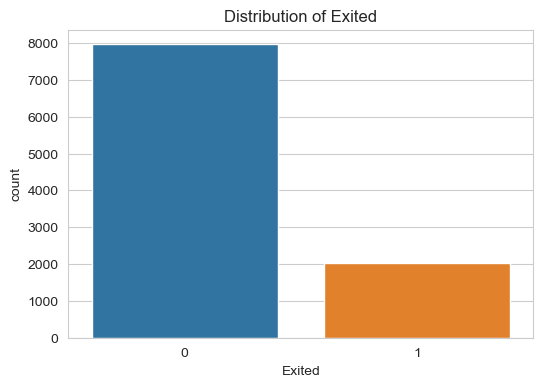

In [13]:
# Distribution of the 'Exited' variable (target)
plt.figure(figsize = (6,4))
sns.countplot(x='Exited', data=df)
# Set labels on the bars using ax.set_xticklabels()
plt.title('Distribution of Exited')
plt.show()

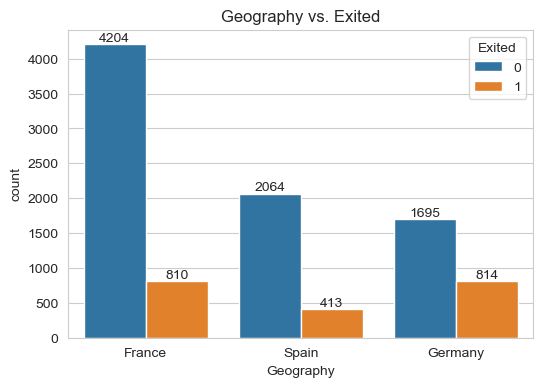

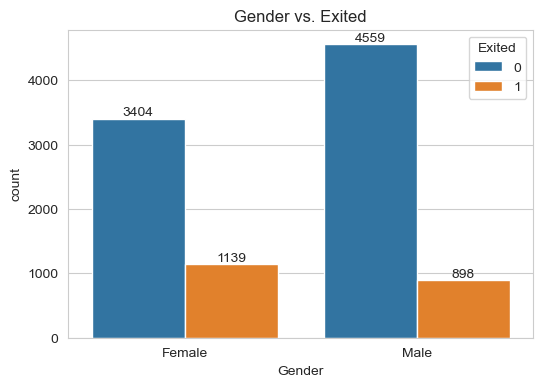

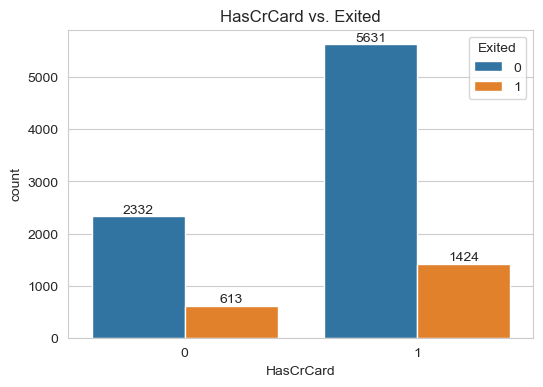

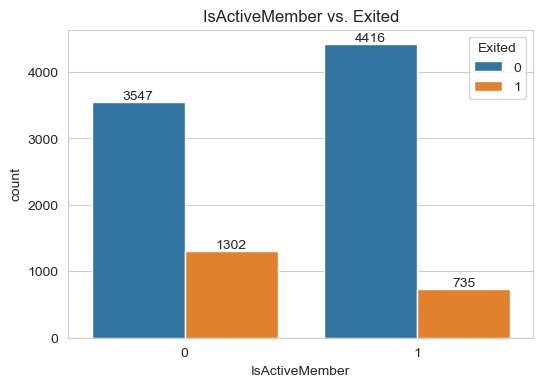

In [14]:
# Visualize the distribution of categorical variables corresponding to the target column 'Exited'.
categorical_columns = ['Geography', 'Gender', 'HasCrCard','IsActiveMember']

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    #The "hue" parameter is used to add another categorical variable to the plot
    ax= sns.countplot(x=column, hue='Exited', data=df)

    #ax.bar_label(ax.containers[0])  The [0] it will only lable the first set of bars 
    
    # Iterate over each container and label the bars
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'{column} vs. Exited')
    plt.show()

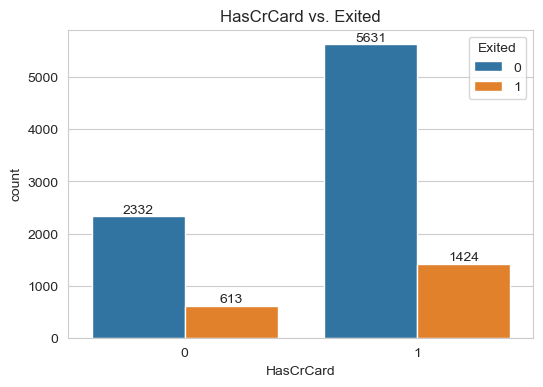

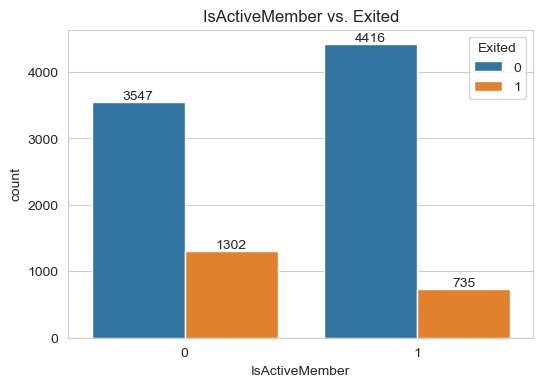

In [15]:
# Visualize the distribution of binary columns corresponding to the target column 'Exited'.
categorical_columns = [ 'HasCrCard','IsActiveMember']

for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    #The "hue" parameter is used to add another categorical variable to the plot
    ax= sns.countplot(x=column, hue='Exited', data=df)

    # Iterate over each container and label the bars
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'{column} vs. Exited')
    plt.show()

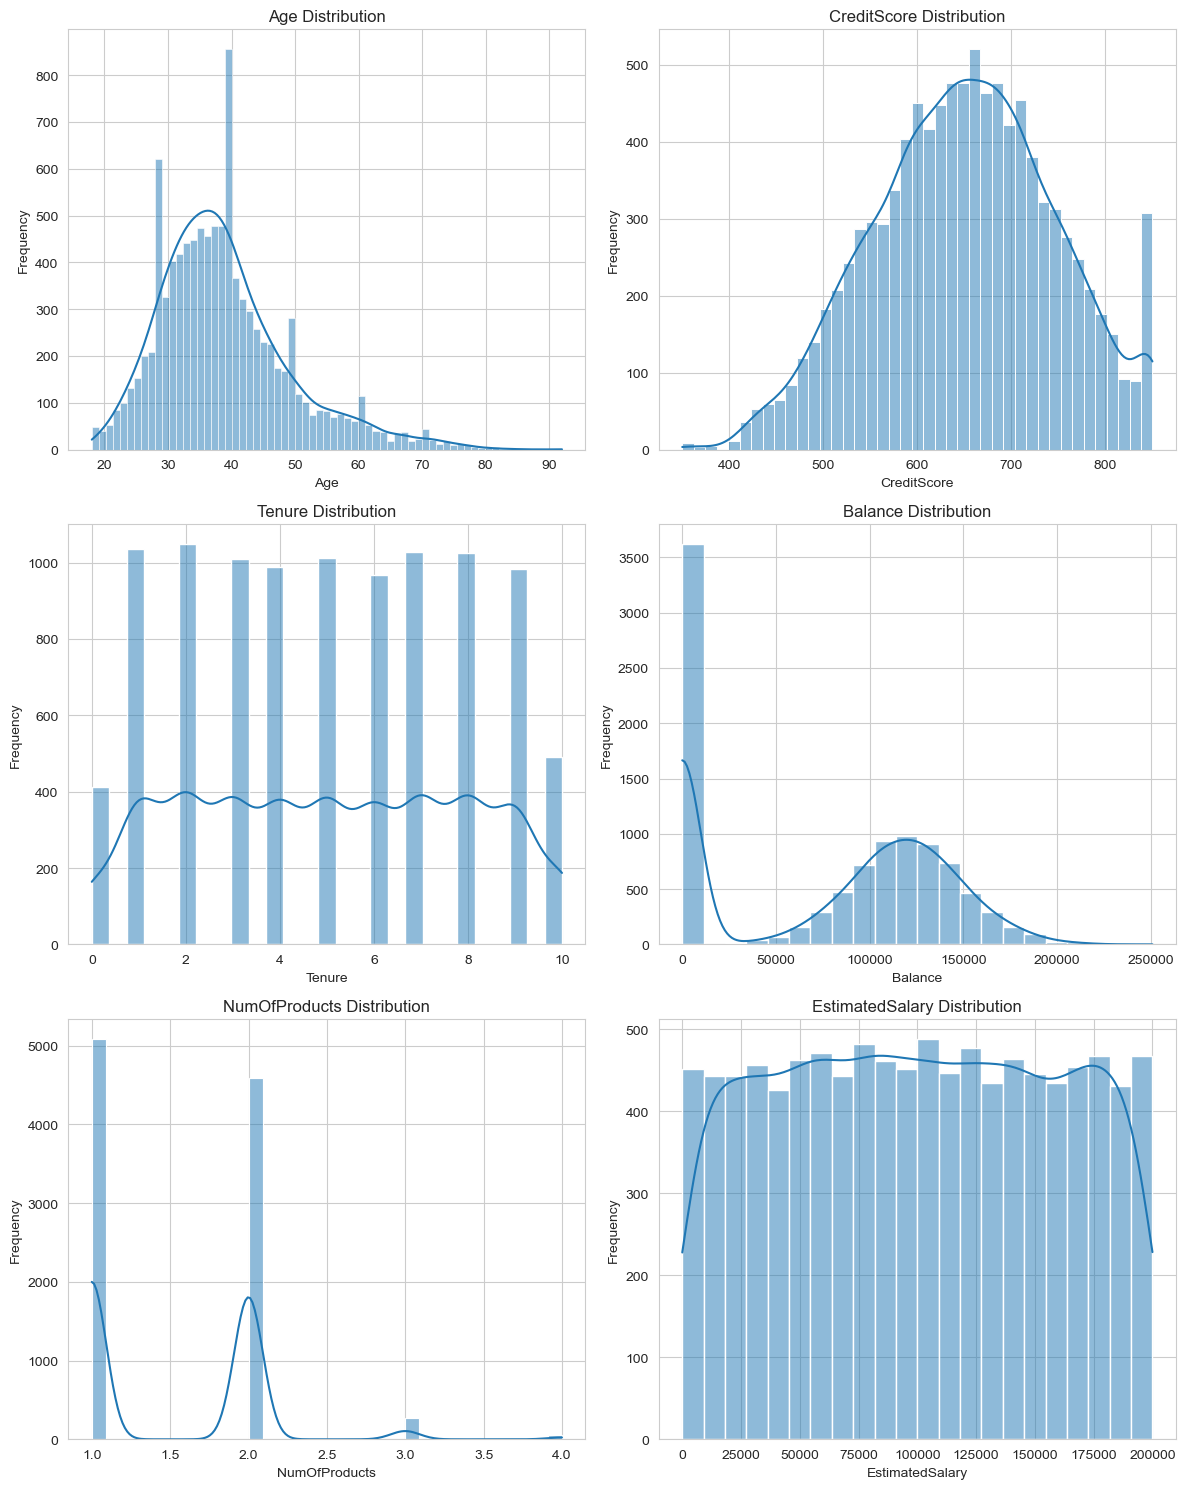

In [16]:
# Visualize the distribution of binary columns corresponding to the target column 'Exited'.

def plot_numeric_variables(df):
    numerical_columns = ['Age','CreditScore', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
    num_cols = len(numerical_columns)
    num_rows = num_cols // 2 + num_cols % 2
    
    plt.figure(figsize=(12, num_rows * 5))
    
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, 2, i)
        sns.histplot(df[column], kde=True)
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_numeric_variables(df)

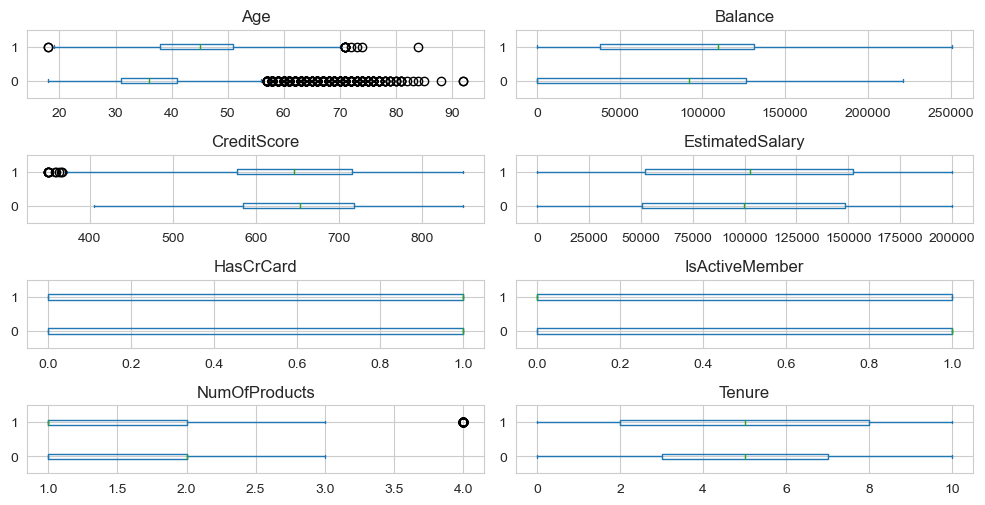

In [17]:
# Plot Boxplot to check for outliers 
df.plot(by ='Exited', kind="box", subplots=True, layout=(32, 2), figsize=(10, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();

In [18]:
numeric_df = df.select_dtypes(include = ['number'])
numeric_df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


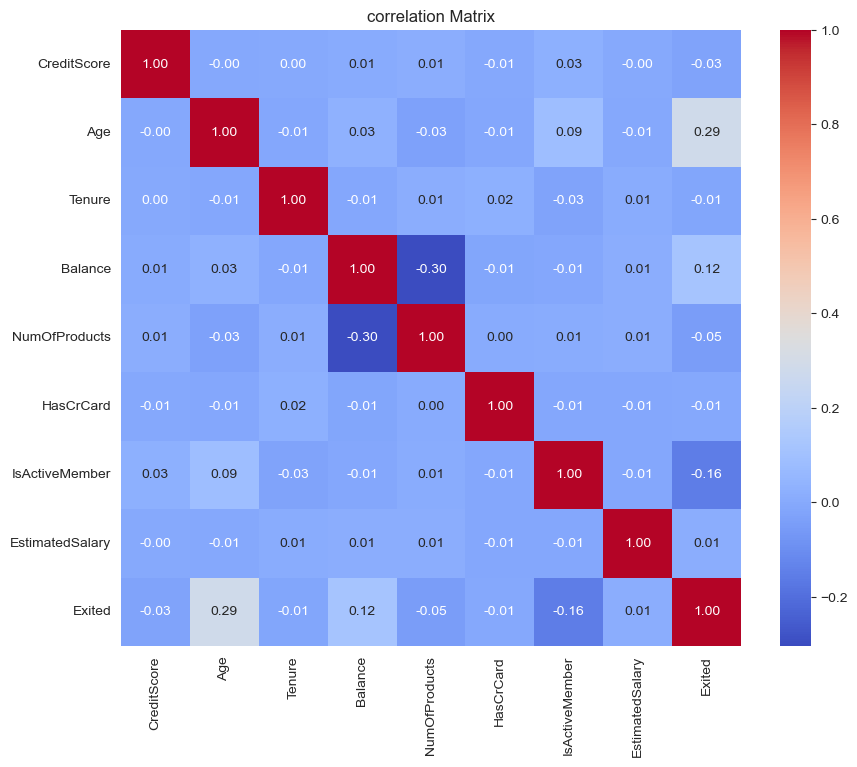

In [19]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include = ['number'])

correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("correlation Matrix")
plt.show()

## One-hot Encoding
Converting the categorical values to binary. For this datasets , I have converted the "Gender" and "Geograpy" columns , as both columns represent non-ordinal categorical data.For this reason I chose "One-hot" encoding techniques over "Mapping"

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [21]:
# Select the categorical columns
categorical_cols = ['Geography', 'Gender']

# Using get_dummies() function to perform one-hot encoding on selected columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [22]:
# Define the column transformer
transformer = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ["Geography", "Gender"]),
    remainder="passthrough"
)

df = pd.DataFrame(transformer.fit_transform(df),
                              columns=transformer.get_feature_names_out())

df

,onehotencoder__Geography_France,onehotencoder__Geography_Germany,onehotencoder__Geography_Spain,onehotencoder__Gender_Female,onehotencoder__Gender_Male,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary,remainder__Exited
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880,1.000
1,0.000,0.000,1.000,1.000,0.000,608.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580,0.000
2,1.000,0.000,0.000,1.000,0.000,502.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570,1.000
3,1.000,0.000,0.000,1.000,0.000,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630,0.000
4,0.000,0.000,1.000,1.000,0.000,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.000,0.000,0.000,0.000,1.000,771.000,39.000,5.000,0.000,2.000,1.000,0.000,96270.640,0.000
9996,1.000,0.000,0.000,0.000,1.000,516.000,35.000,10.000,57369.610,1.000,1.000,1.000,101699.770,0.000
9997,1.000,0.000,0.000,1.000,0.000,709.000,36.000,7.000,0.000,1.000,0.000,1.000,42085.580,1.000
9998,0.000,1.000,0.000,0.000,1.000,772.000,42.000,3.000,75075.310,2.000,1.000,0.000,92888.520,1.000


# Preprocessing of Data
- Train | Test Split, Scalling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [24]:
X = df.drop(columns="remainder__Exited")
y = df['remainder__Exited']

In [25]:
X

,onehotencoder__Geography_France,onehotencoder__Geography_Germany,onehotencoder__Geography_Spain,onehotencoder__Gender_Female,onehotencoder__Gender_Male,remainder__CreditScore,remainder__Age,remainder__Tenure,remainder__Balance,remainder__NumOfProducts,remainder__HasCrCard,remainder__IsActiveMember,remainder__EstimatedSalary
0,1.000,0.000,0.000,1.000,0.000,619.000,42.000,2.000,0.000,1.000,1.000,1.000,101348.880
1,0.000,0.000,1.000,1.000,0.000,608.000,41.000,1.000,83807.860,1.000,0.000,1.000,112542.580
2,1.000,0.000,0.000,1.000,0.000,502.000,42.000,8.000,159660.800,3.000,1.000,0.000,113931.570
3,1.000,0.000,0.000,1.000,0.000,699.000,39.000,1.000,0.000,2.000,0.000,0.000,93826.630
4,0.000,0.000,1.000,1.000,0.000,850.000,43.000,2.000,125510.820,1.000,1.000,1.000,79084.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.000,0.000,0.000,0.000,1.000,771.000,39.000,5.000,0.000,2.000,1.000,0.000,96270.640
9996,1.000,0.000,0.000,0.000,1.000,516.000,35.000,10.000,57369.610,1.000,1.000,1.000,101699.770
9997,1.000,0.000,0.000,1.000,0.000,709.000,36.000,7.000,0.000,1.000,0.000,1.000,42085.580
9998,0.000,1.000,0.000,0.000,1.000,772.000,42.000,3.000,75075.310,2.000,1.000,0.000,92888.520


In [26]:
y

0      1.000
1      0.000
2      1.000
3      0.000
4      0.000
        ... 
9995   0.000
9996   0.000
9997   1.000
9998   1.000
9999   0.000
Name: remainder__Exited, Length: 10000, dtype: float64

In [27]:
seed = 42

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,stratify= y_train, test_size=0.1, random_state=seed)


In [28]:
# IT is used to scale the features 
scaler = MinMaxScaler()

In [29]:
# Fit and transform the data using the scaler
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [30]:
import tensorflow as tf

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.optimizers import Adam

In [32]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [33]:
X_train.shape

(7200, 13)

In [34]:
X_val.shape

(800, 13)

In [35]:
X_test.shape

(2000, 13)

## The First Model without  class_weight

In [36]:
tf.random.set_seed(seed)

model = Sequential()
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer= "Adam" , loss="binary_crossentropy", metrics="accuracy")

In [37]:
model.fit(x=X_train,y=y_train,validation_data = (X_val , y_val) ,batch_size=64,epochs=50)

Epoch 1/50
113/113 [==============================] - 2s 4ms/step - loss: 0.6206 - accuracy: 0.6904 - val_loss: 0.5079 - val_accuracy: 0.7950
Epoch 2/50
113/113 [==============================] - 0s 3ms/step - loss: 0.4906 - accuracy: 0.7944 - val_loss: 0.4765 - val_accuracy: 0.7950
Epoch 3/50
113/113 [==============================] - 0s 3ms/step - loss: 0.4726 - accuracy: 0.7944 - val_loss: 0.4678 - val_accuracy: 0.7950
Epoch 4/50
113/113 [==============================] - 1s 5ms/step - loss: 0.4631 - accuracy: 0.7944 - val_loss: 0.4591 - val_accuracy: 0.7950
Epoch 5/50
113/113 [==============================] - 1s 5ms/step - loss: 0.4552 - accuracy: 0.7960 - val_loss: 0.4508 - val_accuracy: 0.7975
Epoch 6/50
113/113 [==============================] - 1s 5ms/step - loss: 0.4452 - accuracy: 0.8022 - val_loss: 0.4430 - val_accuracy: 0.7987
Epoch 7/50
113/113 [==============================] - 0s 3ms/step - loss: 0.4364 - accuracy: 0.8061 - val_loss: 0.4308 - val_accuracy: 0.8112
Epoch 

In [38]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.621,0.690,0.508,0.795
1,0.491,0.794,0.476,0.795
2,0.473,0.794,0.468,0.795
3,0.463,0.794,0.459,0.795
4,0.455,0.796,0.451,0.798


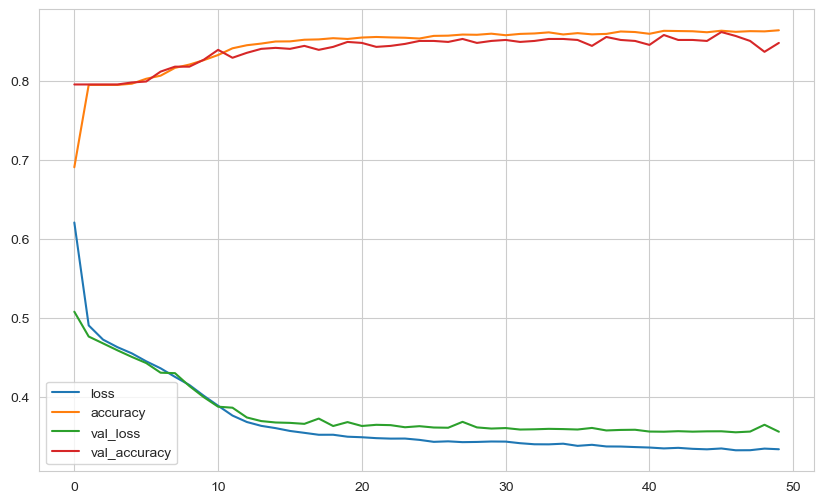

In [39]:
loss_df.plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [41]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3430691361427307
accuracy:  0.8550000190734863


In [42]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train))

225/225 [==============================] - 1s 3ms/step
[[5509  211]
 [ 756  724]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5720
         1.0       1.00      1.00      1.00      1480

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



In [43]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[1522   85]
 [ 205  188]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      1607
         1.0       0.69      0.48      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print("AUC: ", auc)

AUC:  0.7127389553654416


63/63 [==============================] - 0s 3ms/step


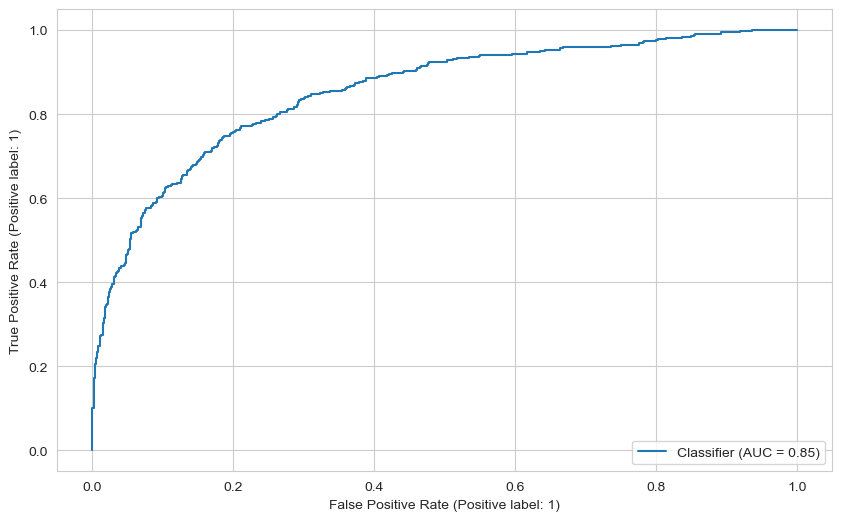

In [45]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

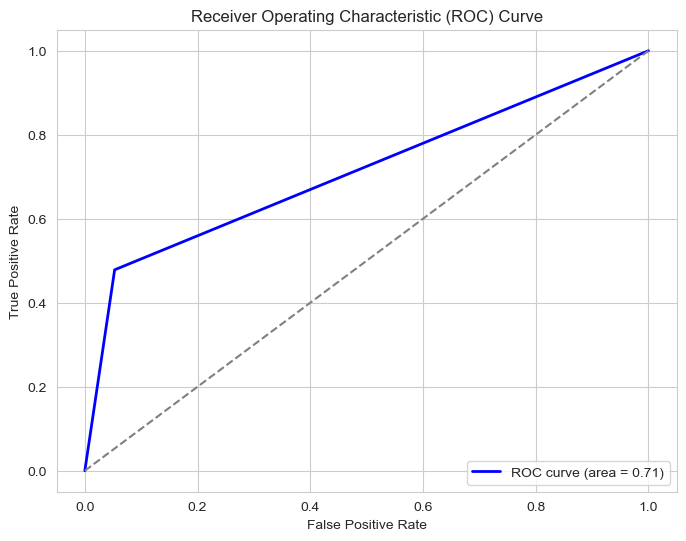

In [46]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [47]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

In [48]:
class_weights

{0: 0.6293706293706294, 1: 2.4324324324324325}

In [49]:
model= Sequential()
 
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(6,  activation="relu"))
model.add(Dense(1, activation="sigmoid"))


model.compile(optimizer= "Adam" , loss="binary_crossentropy", metrics=["Recall"])

In [50]:
model.fit(x = X_train, y = y_train, validation_data = (X_val , y_val), batch_size = 64, epochs = 50, class_weight=class_weights)

Epoch 1/50
113/113 [==============================] - 3s 6ms/step - loss: 0.6787 - recall: 0.8088 - val_loss: 0.6861 - val_recall: 0.6585
Epoch 2/50
113/113 [==============================] - 0s 3ms/step - loss: 0.6447 - recall: 0.6324 - val_loss: 0.6330 - val_recall: 0.6098
Epoch 3/50
113/113 [==============================] - 0s 4ms/step - loss: 0.6235 - recall: 0.6142 - val_loss: 0.6414 - val_recall: 0.7073
Epoch 4/50
113/113 [==============================] - 1s 5ms/step - loss: 0.6054 - recall: 0.6703 - val_loss: 0.5935 - val_recall: 0.6524
Epoch 5/50
113/113 [==============================] - 1s 5ms/step - loss: 0.5891 - recall: 0.6818 - val_loss: 0.5892 - val_recall: 0.7073
Epoch 6/50
113/113 [==============================] - 1s 5ms/step - loss: 0.5701 - recall: 0.6986 - val_loss: 0.5151 - val_recall: 0.6037
Epoch 7/50
113/113 [==============================] - 1s 6ms/step - loss: 0.5558 - recall: 0.7142 - val_loss: 0.5205 - val_recall: 0.6098
Epoch 8/50
113/113 [==============

In [51]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.679,0.809,0.686,0.659
1,0.645,0.632,0.633,0.610
2,0.624,0.614,0.641,0.707
3,0.605,0.670,0.594,0.652
4,0.589,0.682,0.589,0.707


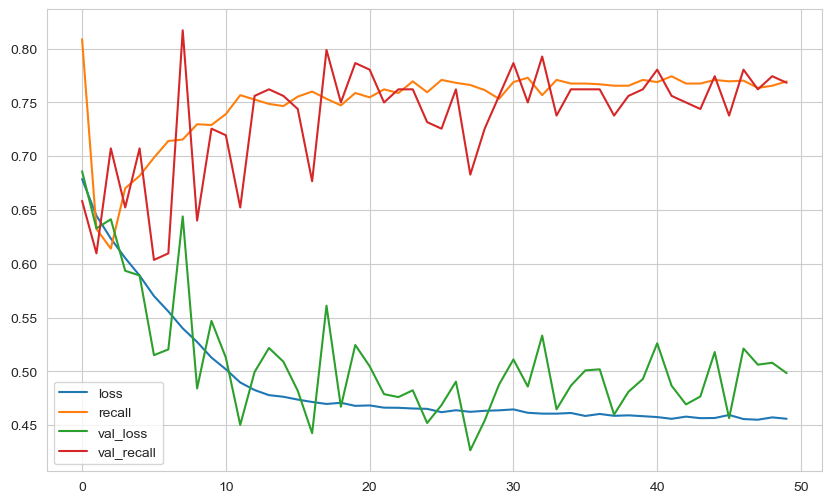

In [52]:
loss_df.plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.49941906332969666
accuracy:  0.7760814428329468


In [54]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train))

225/225 [==============================] - 0s 1ms/step
[[4345 1375]
 [ 290 1190]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5720
         1.0       1.00      1.00      1.00      1480

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



In [55]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1196  411]
 [  88  305]]
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.83      1607
         1.0       0.43      0.78      0.55       393

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print("AUC: ", auc)

AUC:  0.7601626788652064


63/63 [==============================] - 0s 1ms/step


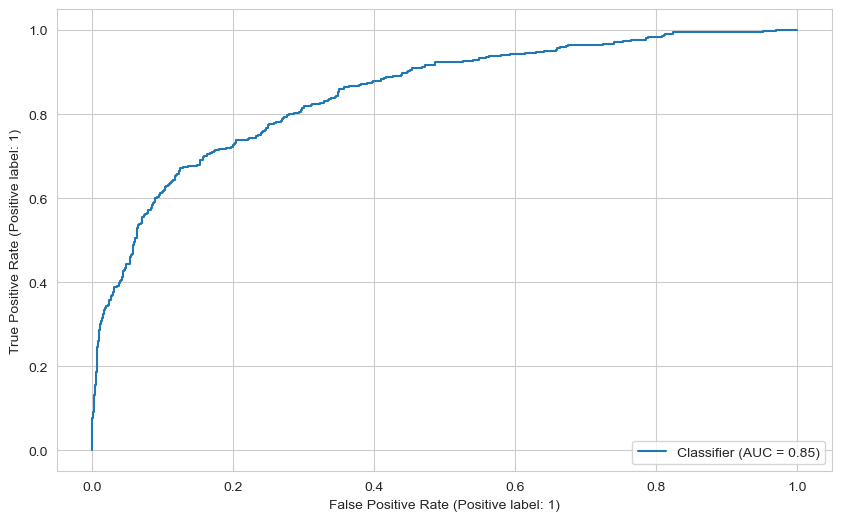

In [57]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

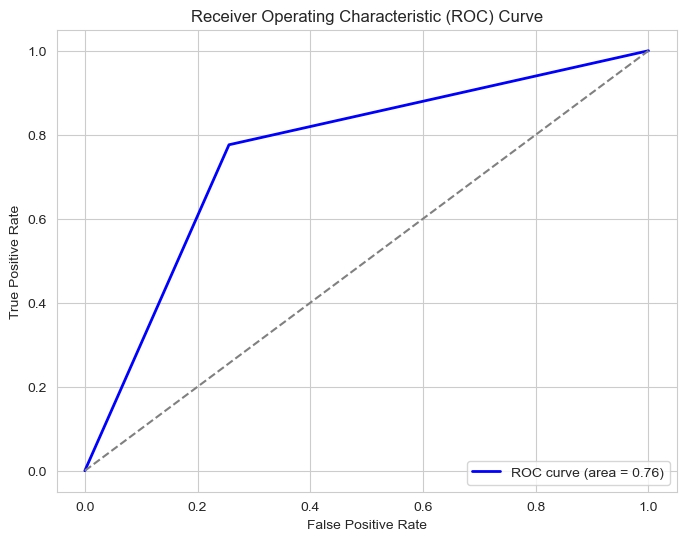

In [58]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method

### Increase The Learning Rate and Observe The Results

In [59]:
tf.random.set_seed(seed)

model= Sequential()
 
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(6,  activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.009)
model.compile(optimizer= opt , loss="binary_crossentropy", metrics=["Recall"])

In [60]:
model.fit(x = X_train, y = y_train, validation_data = (X_val , y_val), batch_size = 64, epochs = 50, class_weight=class_weights)

Epoch 1/50
113/113 [==============================] - 2s 4ms/step - loss: 0.6355 - recall: 0.6095 - val_loss: 0.7677 - val_recall: 0.8537
Epoch 2/50
113/113 [==============================] - 0s 3ms/step - loss: 0.6016 - recall: 0.6439 - val_loss: 0.5835 - val_recall: 0.6646
Epoch 3/50
113/113 [==============================] - 1s 5ms/step - loss: 0.5606 - recall: 0.6953 - val_loss: 0.5507 - val_recall: 0.7012
Epoch 4/50
113/113 [==============================] - 1s 5ms/step - loss: 0.5153 - recall: 0.7142 - val_loss: 0.6318 - val_recall: 0.8110
Epoch 5/50
113/113 [==============================] - 1s 7ms/step - loss: 0.4920 - recall: 0.7304 - val_loss: 0.6756 - val_recall: 0.8720
Epoch 6/50
113/113 [==============================] - 1s 6ms/step - loss: 0.4908 - recall: 0.7277 - val_loss: 0.5808 - val_recall: 0.8049
Epoch 7/50
113/113 [==============================] - 1s 5ms/step - loss: 0.4850 - recall: 0.7419 - val_loss: 0.5314 - val_recall: 0.7866
Epoch 8/50
113/113 [==============

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 24)                336       
                                                                 
 dense_9 (Dense)             (None, 12)                300       
                                                                 
 dense_10 (Dense)            (None, 6)                 78        
                                                                 
 dense_11 (Dense)            (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.635,0.609,0.768,0.854
1,0.602,0.644,0.583,0.665
2,0.561,0.695,0.551,0.701
3,0.515,0.714,0.632,0.811
4,0.492,0.730,0.676,0.872


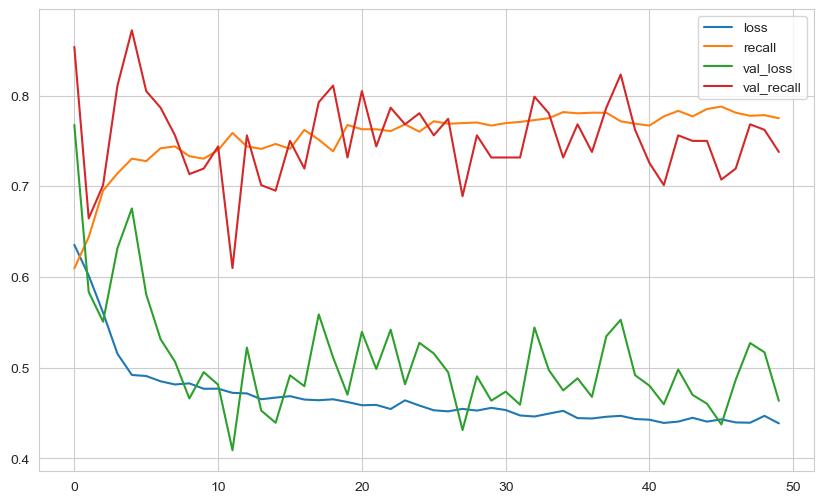

In [63]:
loss_df.plot()
plt.show()

## Evaluating the Model after increasing the "Learning Rate" 

In [64]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4449341297149658
accuracy:  0.7608142495155334


In [65]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train))

225/225 [==============================] - 1s 2ms/step
[[4676 1044]
 [ 336 1144]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5720
         1.0       1.00      1.00      1.00      1480

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



In [66]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1284  323]
 [  94  299]]
              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      1607
         1.0       0.48      0.76      0.59       393

    accuracy                           0.79      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.84      0.79      0.81      2000



In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print("AUC: ", auc)

AUC:  0.779909302653309


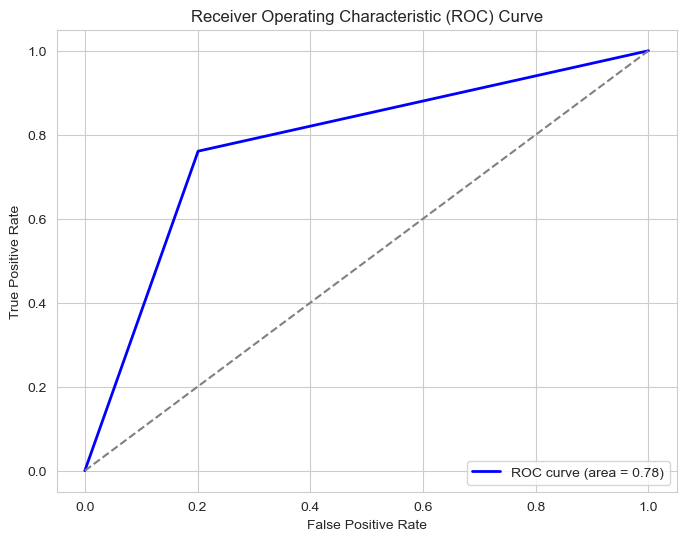

In [68]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

63/63 [==============================] - 0s 2ms/step


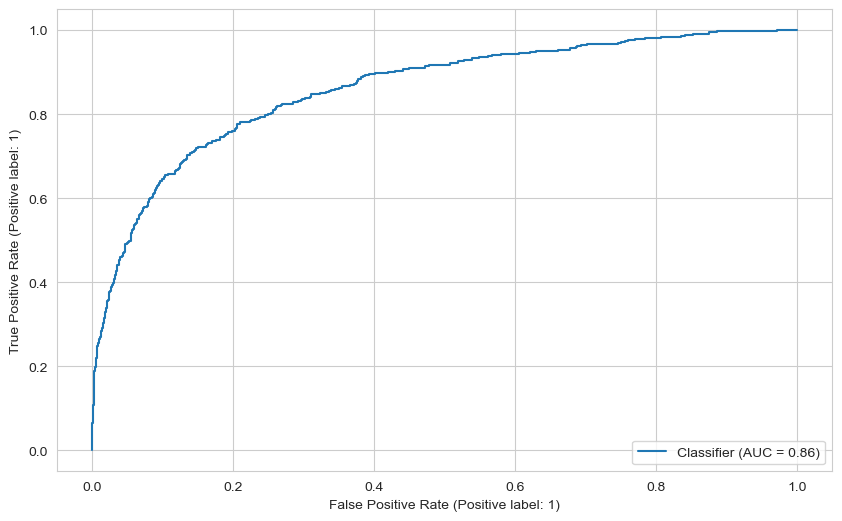

In [69]:
y_pred = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred)

### Add Dropout Layer

In [70]:
from tensorflow.keras.layers import Dropout

In [71]:
tf.random.set_seed(seed)

model = Sequential()
 
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

model.add(Dense(12, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(6, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer= "Adam" , loss="binary_crossentropy", metrics=["Recall"])

In [72]:
model.fit(x = X_train, y = y_train,validation_data = (X_val , y_val), batch_size = 64, epochs = 100,class_weight = class_weights)

Epoch 1/100
113/113 [==============================] - 5s 16ms/step - loss: 0.6942 - recall: 0.7520 - val_loss: 0.7052 - val_recall: 0.8049
Epoch 2/100
113/113 [==============================] - 1s 7ms/step - loss: 0.6780 - recall: 0.6284 - val_loss: 0.6836 - val_recall: 0.6159
Epoch 3/100
113/113 [==============================] - 1s 6ms/step - loss: 0.6630 - recall: 0.5500 - val_loss: 0.6617 - val_recall: 0.5915
Epoch 4/100
113/113 [==============================] - 1s 6ms/step - loss: 0.6564 - recall: 0.5277 - val_loss: 0.6549 - val_recall: 0.5976
Epoch 5/100
113/113 [==============================] - 1s 7ms/step - loss: 0.6519 - recall: 0.5378 - val_loss: 0.6464 - val_recall: 0.6220
Epoch 6/100
113/113 [==============================] - 1s 5ms/step - loss: 0.6419 - recall: 0.5709 - val_loss: 0.6336 - val_recall: 0.5976
Epoch 7/100
113/113 [==============================] - 1s 7ms/step - loss: 0.6319 - recall: 0.5926 - val_loss: 0.6228 - val_recall: 0.6402
Epoch 8/100
113/113 [=====

113/113 [==============================] - 0s 3ms/step - loss: 0.4839 - recall: 0.7541 - val_loss: 0.4964 - val_recall: 0.8049
Epoch 60/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4813 - recall: 0.7574 - val_loss: 0.4672 - val_recall: 0.7744
Epoch 61/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4857 - recall: 0.7561 - val_loss: 0.4686 - val_recall: 0.7744
Epoch 62/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4842 - recall: 0.7662 - val_loss: 0.5143 - val_recall: 0.8110
Epoch 63/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4867 - recall: 0.7595 - val_loss: 0.4670 - val_recall: 0.7622
Epoch 64/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4863 - recall: 0.7568 - val_loss: 0.4887 - val_recall: 0.8049
Epoch 65/100
113/113 [==============================] - 0s 3ms/step - loss: 0.4893 - recall: 0.7480 - val_loss: 0.4767 - val_recall: 0.7683
Epoch 66/100
113/113 [===========

In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                336       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_13 (Dense)            (None, 12)                300       
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_14 (Dense)            (None, 6)                 78        
                                                                 
 dropout_2 (Dropout)         (None, 6)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [74]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.694,0.752,0.705,0.805
1,0.678,0.628,0.684,0.616
2,0.663,0.550,0.662,0.591
3,0.656,0.528,0.655,0.598
4,0.652,0.538,0.646,0.622


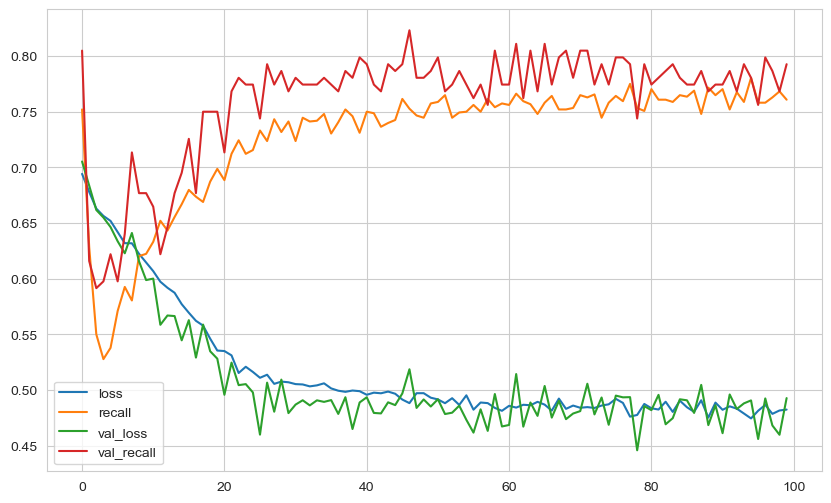

In [75]:
loss_df.plot()
plt.show()

## Evaluating the Model with adding "drop" layers

In [76]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.48115789890289307
accuracy:  0.7811704874038696


In [77]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train))

225/225 [==============================] - 1s 3ms/step
[[4310 1410]
 [ 266 1214]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5720
         1.0       1.00      1.00      1.00      1480

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



In [78]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[1189  418]
 [  86  307]]
              precision    recall  f1-score   support

         0.0       0.93      0.74      0.83      1607
         1.0       0.42      0.78      0.55       393

    accuracy                           0.75      2000
   macro avg       0.68      0.76      0.69      2000
weighted avg       0.83      0.75      0.77      2000



In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print("AUC: ", auc)

AUC:  0.7605292367520597


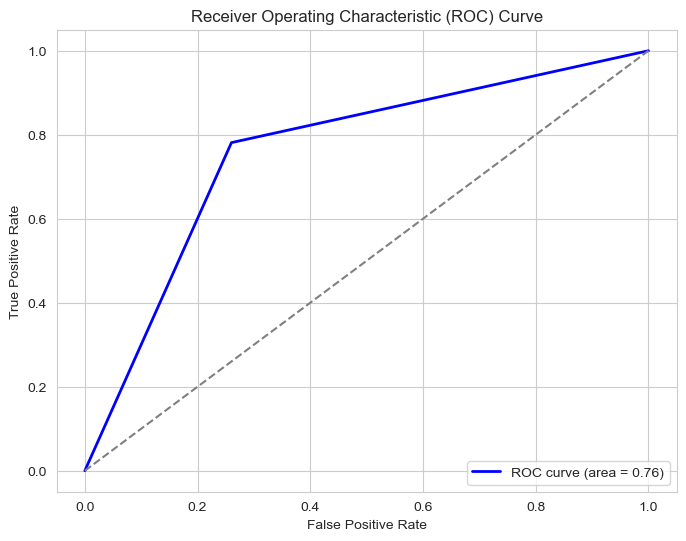

In [80]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Add Early Stop

In [81]:
from tensorflow.keras.callbacks import EarlyStopping

#### Monitor the "val_loss" as metric

In [82]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [83]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True)

In [84]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data = (X_val , y_val),
    batch_size=64,
    epochs=500,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/500
113/113 [==============================] - 4s 13ms/step - loss: 0.5033 - recall: 0.0000e+00 - val_loss: 0.4731 - val_recall: 0.0000e+00
Epoch 2/500
113/113 [==============================] - 1s 7ms/step - loss: 0.4660 - recall: 0.0284 - val_loss: 0.4563 - val_recall: 0.0976
Epoch 3/500
113/113 [==============================] - 1s 6ms/step - loss: 0.4531 - recall: 0.1020 - val_loss: 0.4478 - val_recall: 0.1646
Epoch 4/500
113/113 [==============================] - 1s 7ms/step - loss: 0.4418 - recall: 0.1291 - val_loss: 0.4354 - val_recall: 0.2073
Epoch 5/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4327 - recall: 0.1872 - val_loss: 0.4235 - val_recall: 0.2622
Epoch 6/500
113/113 [==============================] - 1s 5ms/step - loss: 0.4196 - recall: 0.2135 - val_loss: 0.4143 - val_recall: 0.2134
Epoch 7/500
113/113 [==============================] - 0s 4ms/step - loss: 0.4110 - recall: 0.2568 - val_loss: 0.4049 - val_recall: 0.2683
Epoch 8/500
113/11

113/113 [==============================] - 1s 5ms/step - loss: 0.3269 - recall: 0.5014 - val_loss: 0.3543 - val_recall: 0.5488
Epoch 60/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3262 - recall: 0.5081 - val_loss: 0.3499 - val_recall: 0.5244
Epoch 61/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3258 - recall: 0.5054 - val_loss: 0.3469 - val_recall: 0.4756
Epoch 62/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3253 - recall: 0.5074 - val_loss: 0.3468 - val_recall: 0.4695
Epoch 63/500
113/113 [==============================] - 1s 5ms/step - loss: 0.3253 - recall: 0.5027 - val_loss: 0.3528 - val_recall: 0.5305
Epoch 64/500
113/113 [==============================] - 1s 6ms/step - loss: 0.3251 - recall: 0.5014 - val_loss: 0.3470 - val_recall: 0.4695
Epoch 65/500
113/113 [==============================] - 1s 7ms/step - loss: 0.3266 - recall: 0.5027 - val_loss: 0.3467 - val_recall: 0.4817
Epoch 66/500
113/113 [===========

In [85]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 24)                336       
                                                                 
 dense_17 (Dense)            (None, 12)                300       
                                                                 
 dense_18 (Dense)            (None, 6)                 78        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.503,0.000,0.473,0.000
1,0.466,0.028,0.456,0.098
2,0.453,0.102,0.448,0.165
3,0.442,0.129,0.435,0.207
4,0.433,0.187,0.423,0.262


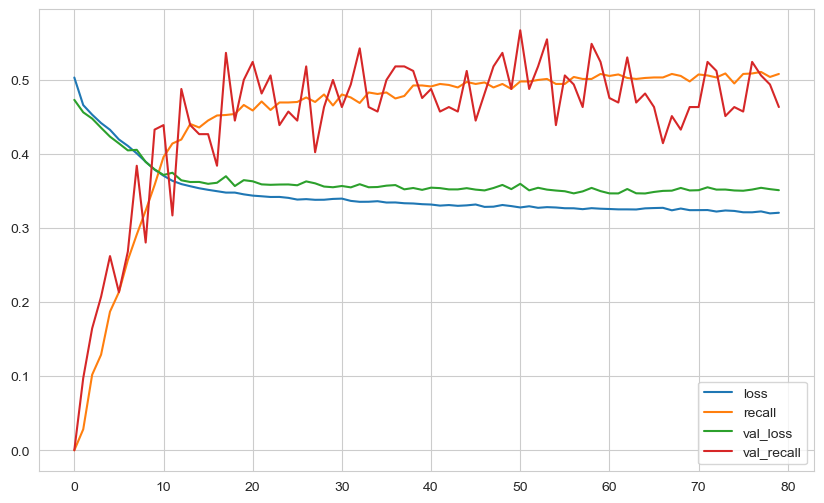

In [87]:
loss_df.plot()
plt.show()

## Evaluating the Model to monitor "val_loss" as metric 

In [88]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3344581425189972
accuracy:  0.4910941421985626


In [89]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train))

225/225 [==============================] - 0s 1ms/step
[[5502  218]
 [ 738  742]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5720
         1.0       1.00      1.00      1.00      1480

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



In [90]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[1532   75]
 [ 200  193]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1607
         1.0       0.72      0.49      0.58       393

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [91]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print("AUC: ", auc)

AUC:  0.7222116661995626


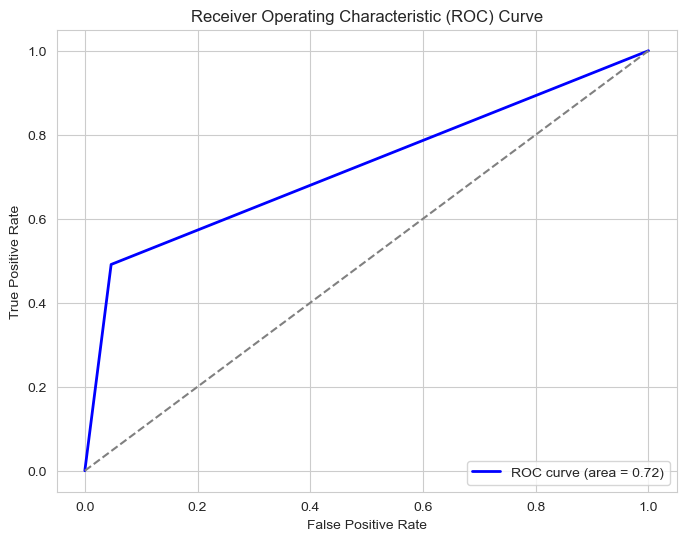

In [92]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Monitor the "val_recall" as metric

In [93]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [94]:
early_stop = EarlyStopping(
    monitor="val_recall", mode="max", verbose=1, patience=15, restore_best_weights=True)

In [95]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data = (X_val , y_val),
    batch_size=128,
    epochs=1000,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/1000
57/57 [==============================] - 4s 20ms/step - loss: 0.7329 - recall: 0.7297 - val_loss: 0.6816 - val_recall: 0.1402
Epoch 2/1000
57/57 [==============================] - 0s 5ms/step - loss: 0.6722 - recall: 0.0561 - val_loss: 0.6643 - val_recall: 0.0000e+00
Epoch 3/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.6576 - recall: 6.7568e-04 - val_loss: 0.6503 - val_recall: 0.0000e+00
Epoch 4/1000
57/57 [==============================] - 0s 7ms/step - loss: 0.6406 - recall: 0.0000e+00 - val_loss: 0.6233 - val_recall: 0.0000e+00
Epoch 5/1000
57/57 [==============================] - 0s 7ms/step - loss: 0.5749 - recall: 0.0000e+00 - val_loss: 0.5054 - val_recall: 0.0000e+00
Epoch 6/1000
57/57 [==============================] - 0s 6ms/step - loss: 0.4920 - recall: 0.0000e+00 - val_loss: 0.4841 - val_recall: 0.0000e+00
Epoch 7/1000
57/57 [==============================] - 0s 5ms/step - loss: 0.4800 - recall: 0.0000e+00 - val_loss: 0.4761 - val_recall: 

In [96]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 24)                336       
                                                                 
 dense_21 (Dense)            (None, 12)                300       
                                                                 
 dense_22 (Dense)            (None, 6)                 78        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 721 (2.82 KB)
Trainable params: 721 (2.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [97]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.733,0.730,0.682,0.140
1,0.672,0.056,0.664,0.000
2,0.658,0.001,0.650,0.000
3,0.641,0.000,0.623,0.000
4,0.575,0.000,0.505,0.000


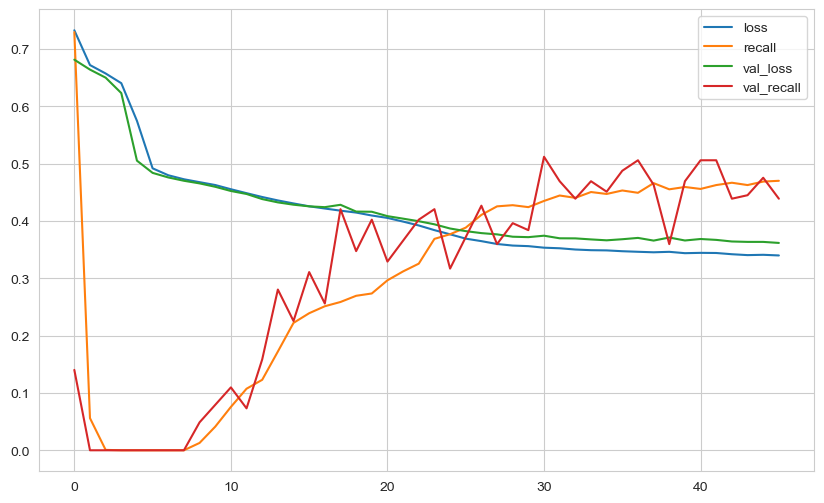

In [98]:
loss_df.plot()
plt.show()

## Evaluating the Model to monitor "val_recall" as metric 


In [99]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.36083105206489563
accuracy:  0.48346054553985596


In [100]:
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train))

225/225 [==============================] - 1s 3ms/step
[[5390  330]
 [ 734  746]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5720
         1.0       1.00      1.00      1.00      1480

    accuracy                           1.00      7200
   macro avg       1.00      1.00      1.00      7200
weighted avg       1.00      1.00      1.00      7200



In [101]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 3ms/step
[[1513   94]
 [ 203  190]]
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      1607
         1.0       0.67      0.48      0.56       393

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print("AUC: ", auc)

AUC:  0.7124832357165138


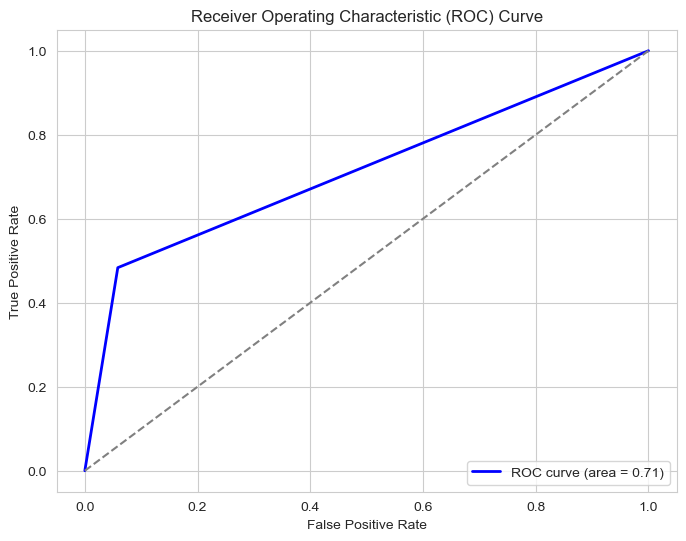

In [103]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Optuna

In [104]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [113]:
tf.random.set_seed(seed)

model= Sequential()
 
model.add(Dense(24, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(12, activation="relu"))
model.add(Dense(6,  activation="relu"))
model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.009)
model.compile(optimizer= opt , loss="binary_crossentropy", metrics=["accuracy"])

In [115]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [116]:
trial_metric = "accuracy"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=100,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [117]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-10-30 22:23:08,379] A new study created in memory with name: no-name-5637769d-c2f4-42f4-9a29-ea6bdadececf
[I 2023-10-30 22:23:59,317] Trial 0 finished with value: 0.8044999837875366 and parameters: {'n_units1': 112, 'n_units2': 124, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 3.281677461739147e-05, 'w0': 0.0800708163274371, 'w1': 0.15511111652770704}. Best is trial 0 with value: 0.8044999837875366.


Restoring model weights from the end of the best epoch: 33.
Epoch 48: early stopping


[I 2023-10-30 22:24:24,993] Trial 1 finished with value: 0.8374999761581421 and parameters: {'n_units1': 64, 'n_units2': 50, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.007900547141396973, 'w0': 0.44648749310020713, 'w1': 0.02550554415588324}. Best is trial 1 with value: 0.8374999761581421.


Restoring model weights from the end of the best epoch: 9.
Epoch 24: early stopping


[I 2023-10-30 22:24:38,642] Trial 2 finished with value: 0.7179999947547913 and parameters: {'n_units1': 79, 'n_units2': 18, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.019858901325111665, 'w0': 0.0638913165327313, 'w1': 0.4582102465853546}. Best is trial 1 with value: 0.8374999761581421.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:24:52,921] Trial 3 finished with value: 0.1965000033378601 and parameters: {'n_units1': 86, 'n_units2': 64, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 4.009615481009828e-05, 'w0': 0.07631778355193877, 'w1': 0.5651655316217371}. Best is trial 1 with value: 0.8374999761581421.


Restoring model weights from the end of the best epoch: 48.
Epoch 63: early stopping


[I 2023-10-30 22:25:26,594] Trial 4 finished with value: 0.8034999966621399 and parameters: {'n_units1': 38, 'n_units2': 81, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0012504626807587674, 'w0': 1.2875732619582643, 'w1': 0.02892211446776426}. Best is trial 1 with value: 0.8374999761581421.
[I 2023-10-30 22:26:17,517] Trial 5 finished with value: 0.8050000071525574 and parameters: {'n_units1': 90, 'n_units2': 27, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 1.5078739492989437e-05, 'w0': 0.14451036410295304, 'w1': 0.18528335161146609}. Best is trial 1 with value: 0.8374999761581421.


Restoring model weights from the end of the best epoch: 47.
Epoch 62: early stopping


[I 2023-10-30 22:26:50,016] Trial 6 finished with value: 0.8144999742507935 and parameters: {'n_units1': 57, 'n_units2': 61, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0012668625055437092, 'w0': 0.28655362994920663, 'w1': 0.011413063230713743}. Best is trial 1 with value: 0.8374999761581421.
[I 2023-10-30 22:27:42,185] Trial 7 finished with value: 0.8475000262260437 and parameters: {'n_units1': 11, 'n_units2': 50, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.00016005419254736837, 'w0': 0.016597304439898316, 'w1': 0.013734104156301524}. Best is trial 7 with value: 0.8475000262260437.


Restoring model weights from the end of the best epoch: 3.
Epoch 18: early stopping


[I 2023-10-30 22:27:54,764] Trial 8 finished with value: 0.8034999966621399 and parameters: {'n_units1': 25, 'n_units2': 12, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0609663156777368, 'w0': 3.083685083265539, 'w1': 0.41680141583674807}. Best is trial 7 with value: 0.8475000262260437.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-10-30 22:28:06,493] Trial 9 finished with value: 0.8034999966621399 and parameters: {'n_units1': 128, 'n_units2': 117, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00013743647741946635, 'w0': 2.9109435159945103, 'w1': 0.25341965012110035}. Best is trial 7 with value: 0.8475000262260437.


{'n_units1': 11,
 'n_units2': 50,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.00016005419254736837,
 'w0': 0.016597304439898316,
 'w1': 0.013734104156301524}

In [129]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data = (X_val , y_val),
    batch_size=128,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
57/57 [==============================] - 2s 11ms/step - loss: 0.6210 - recall: 0.0095 - val_loss: 0.6034 - val_recall: 0.0000e+00
Epoch 2/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5811 - recall: 0.0000e+00 - val_loss: 0.5674 - val_recall: 0.0000e+00
Epoch 3/500
57/57 [==============================] - 0s 5ms/step - loss: 0.5461 - recall: 0.0000e+00 - val_loss: 0.5389 - val_recall: 0.0000e+00
Epoch 4/500
57/57 [==============================] - 0s 6ms/step - loss: 0.5217 - recall: 0.0000e+00 - val_loss: 0.5224 - val_recall: 0.0000e+00
Epoch 5/500
57/57 [==============================] - 0s 3ms/step - loss: 0.5083 - recall: 0.0000e+00 - val_loss: 0.5131 - val_recall: 0.0000e+00
Epoch 6/500
57/57 [==============================] - 0s 4ms/step - loss: 0.5003 - recall: 0.0000e+00 - val_loss: 0.5069 - val_recall: 0.0000e+00
Epoch 7/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4946 - recall: 0.0000e+00 - val_loss: 0.5017 - val_recall:

57/57 [==============================] - 0s 4ms/step - loss: 0.4278 - recall: 0.2020 - val_loss: 0.4292 - val_recall: 0.2317
Epoch 60/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4274 - recall: 0.2155 - val_loss: 0.4288 - val_recall: 0.2317
Epoch 61/500
57/57 [==============================] - 0s 5ms/step - loss: 0.4270 - recall: 0.2101 - val_loss: 0.4284 - val_recall: 0.2317
Epoch 62/500
57/57 [==============================] - 0s 5ms/step - loss: 0.4267 - recall: 0.2081 - val_loss: 0.4283 - val_recall: 0.2439
Epoch 63/500
57/57 [==============================] - 0s 5ms/step - loss: 0.4264 - recall: 0.2196 - val_loss: 0.4278 - val_recall: 0.2378
Epoch 64/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4260 - recall: 0.2122 - val_loss: 0.4278 - val_recall: 0.2500
Epoch 65/500
57/57 [==============================] - 0s 2ms/step - loss: 0.4257 - recall: 0.2203 - val_loss: 0.4275 - val_recall: 0.2500
Epoch 66/500
57/57 [===========================

57/57 [==============================] - 0s 3ms/step - loss: 0.4061 - recall: 0.3095 - val_loss: 0.4129 - val_recall: 0.3110
Epoch 119/500
57/57 [==============================] - 0s 3ms/step - loss: 0.4055 - recall: 0.3007 - val_loss: 0.4129 - val_recall: 0.3476
Epoch 120/500
57/57 [==============================] - 0s 3ms/step - loss: 0.4054 - recall: 0.3088 - val_loss: 0.4129 - val_recall: 0.3537
Epoch 121/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4049 - recall: 0.3061 - val_loss: 0.4120 - val_recall: 0.3415
Epoch 122/500
57/57 [==============================] - 0s 3ms/step - loss: 0.4045 - recall: 0.3108 - val_loss: 0.4120 - val_recall: 0.3537
Epoch 123/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4043 - recall: 0.3209 - val_loss: 0.4115 - val_recall: 0.3354
Epoch 124/500
57/57 [==============================] - 0s 4ms/step - loss: 0.4038 - recall: 0.3149 - val_loss: 0.4112 - val_recall: 0.3415
Epoch 125/500
57/57 [====================

57/57 [==============================] - 0s 5ms/step - loss: 0.3879 - recall: 0.3439 - val_loss: 0.3976 - val_recall: 0.3598
Epoch 178/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3879 - recall: 0.3453 - val_loss: 0.3978 - val_recall: 0.3598
Epoch 179/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3874 - recall: 0.3574 - val_loss: 0.3975 - val_recall: 0.3598
Epoch 180/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3873 - recall: 0.3493 - val_loss: 0.3969 - val_recall: 0.3598
Epoch 181/500
57/57 [==============================] - 0s 2ms/step - loss: 0.3868 - recall: 0.3608 - val_loss: 0.3964 - val_recall: 0.3476
Epoch 182/500
57/57 [==============================] - 0s 2ms/step - loss: 0.3866 - recall: 0.3534 - val_loss: 0.3962 - val_recall: 0.3476
Epoch 183/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3864 - recall: 0.3493 - val_loss: 0.3961 - val_recall: 0.3537
Epoch 184/500
57/57 [====================

57/57 [==============================] - 0s 4ms/step - loss: 0.3703 - recall: 0.3872 - val_loss: 0.3841 - val_recall: 0.4024
Epoch 237/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3701 - recall: 0.3932 - val_loss: 0.3831 - val_recall: 0.3780
Epoch 238/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3698 - recall: 0.3926 - val_loss: 0.3826 - val_recall: 0.3720
Epoch 239/500
57/57 [==============================] - 0s 5ms/step - loss: 0.3695 - recall: 0.3885 - val_loss: 0.3827 - val_recall: 0.3780
Epoch 240/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3694 - recall: 0.3892 - val_loss: 0.3827 - val_recall: 0.3902
Epoch 241/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3687 - recall: 0.3899 - val_loss: 0.3823 - val_recall: 0.3841
Epoch 242/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3683 - recall: 0.3946 - val_loss: 0.3817 - val_recall: 0.3780
Epoch 243/500
57/57 [====================

57/57 [==============================] - 0s 4ms/step - loss: 0.3529 - recall: 0.4243 - val_loss: 0.3693 - val_recall: 0.4390
Epoch 296/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3527 - recall: 0.4277 - val_loss: 0.3683 - val_recall: 0.4390
Epoch 297/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3521 - recall: 0.4230 - val_loss: 0.3682 - val_recall: 0.4390
Epoch 298/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3521 - recall: 0.4270 - val_loss: 0.3680 - val_recall: 0.4390
Epoch 299/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3518 - recall: 0.4311 - val_loss: 0.3678 - val_recall: 0.4329
Epoch 300/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3517 - recall: 0.4257 - val_loss: 0.3680 - val_recall: 0.4451
Epoch 301/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3512 - recall: 0.4324 - val_loss: 0.3675 - val_recall: 0.4390
Epoch 302/500
57/57 [====================

57/57 [==============================] - 0s 3ms/step - loss: 0.3418 - recall: 0.4635 - val_loss: 0.3582 - val_recall: 0.4756
Epoch 355/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3411 - recall: 0.4554 - val_loss: 0.3585 - val_recall: 0.4756
Epoch 356/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3410 - recall: 0.4649 - val_loss: 0.3579 - val_recall: 0.4756
Epoch 357/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3408 - recall: 0.4561 - val_loss: 0.3576 - val_recall: 0.4512
Epoch 358/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3411 - recall: 0.4500 - val_loss: 0.3577 - val_recall: 0.4756
Epoch 359/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3408 - recall: 0.4622 - val_loss: 0.3574 - val_recall: 0.4756
Epoch 360/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3406 - recall: 0.4534 - val_loss: 0.3575 - val_recall: 0.4756
Epoch 361/500
57/57 [====================

57/57 [==============================] - 0s 3ms/step - loss: 0.3354 - recall: 0.4716 - val_loss: 0.3533 - val_recall: 0.4878
Epoch 414/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3354 - recall: 0.4709 - val_loss: 0.3531 - val_recall: 0.4878
Epoch 415/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3354 - recall: 0.4730 - val_loss: 0.3534 - val_recall: 0.4939
Epoch 416/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3353 - recall: 0.4716 - val_loss: 0.3525 - val_recall: 0.4878
Epoch 417/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3352 - recall: 0.4784 - val_loss: 0.3526 - val_recall: 0.4634
Epoch 418/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3354 - recall: 0.4716 - val_loss: 0.3523 - val_recall: 0.4756
Epoch 419/500
57/57 [==============================] - 0s 3ms/step - loss: 0.3352 - recall: 0.4662 - val_loss: 0.3522 - val_recall: 0.4878
Epoch 420/500
57/57 [====================

57/57 [==============================] - 0s 3ms/step - loss: 0.3326 - recall: 0.4689 - val_loss: 0.3510 - val_recall: 0.4939
Epoch 473/500
57/57 [==============================] - 0s 4ms/step - loss: 0.3329 - recall: 0.4824 - val_loss: 0.3507 - val_recall: 0.4756
Epoch 474/500
57/57 [==============================] - 0s 5ms/step - loss: 0.3326 - recall: 0.4858 - val_loss: 0.3510 - val_recall: 0.4695
Epoch 475/500
57/57 [==============================] - 0s 5ms/step - loss: 0.3324 - recall: 0.4709 - val_loss: 0.3511 - val_recall: 0.4939
Epoch 476/500
57/57 [==============================] - 0s 5ms/step - loss: 0.3323 - recall: 0.4824 - val_loss: 0.3510 - val_recall: 0.4878
Epoch 477/500
57/57 [==============================] - 0s 5ms/step - loss: 0.3323 - recall: 0.4777 - val_loss: 0.3509 - val_recall: 0.4939
Epoch 478/500
57/57 [==============================] - 0s 6ms/step - loss: 0.3321 - recall: 0.4838 - val_loss: 0.3508 - val_recall: 0.4756
Epoch 479/500
57/57 [====================

In [130]:
history = model.history.history

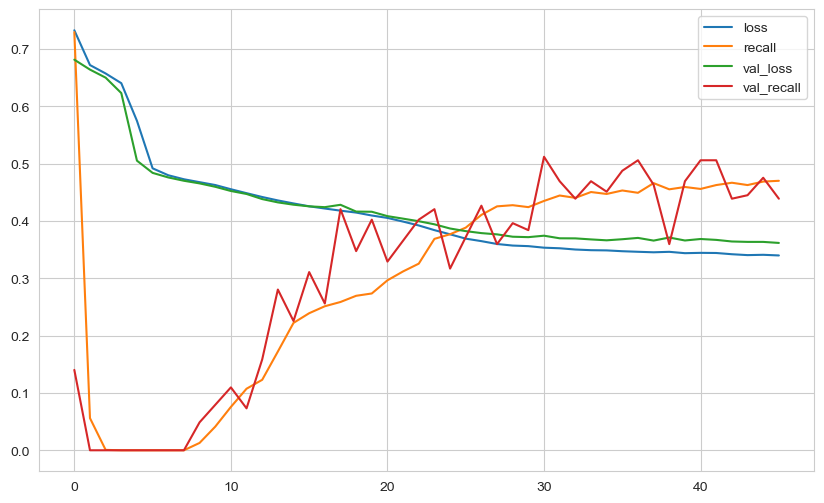

In [131]:
loss_df.plot()
plt.show()

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [132]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1528   79]
 [ 204  189]]
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1607
         1.0       0.71      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.72      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [133]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute AUC score
auc = roc_auc_score(y_test, y_pred)

# Print AUC score
print("AUC: ", auc)

AUC:  0.7158780526038278


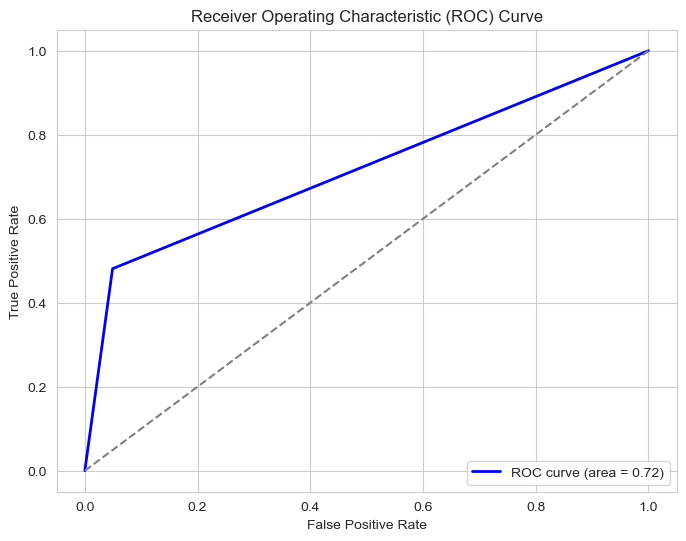

In [134]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Final Model and Model Deployment

In [135]:
import pickle
pickle.dump(transformer, open("transformer_churn", "wb"))
pickle.dump(scaler, open("scaler_churn", "wb"))

In [136]:
model.save("model_cancer.h5")

## Prediction

In [138]:
single_customer = df.drop(columns = "remainder__Exited").iloc[0]
single_customer

onehotencoder__Geography_France         1.000
onehotencoder__Geography_Germany        0.000
onehotencoder__Geography_Spain          0.000
onehotencoder__Gender_Female            1.000
onehotencoder__Gender_Male              0.000
remainder__CreditScore                619.000
remainder__Age                         42.000
remainder__Tenure                       2.000
remainder__Balance                      0.000
remainder__NumOfProducts                1.000
remainder__HasCrCard                    1.000
remainder__IsActiveMember               1.000
remainder__EstimatedSalary         101348.880
Name: 0, dtype: float64

In [139]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 13))
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.        ,
        0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50659631]])

In [140]:
model.predict(single_customer)

1/1 [==============================] - 0s 42ms/step


array([[0.34089553]], dtype=float32)

In [142]:
df["remainder__Exited"].iloc[0]

1.0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___